# Combine the raw, labels and prediction together MRI data together and get the live animation

In [1]:
import nibabel as nib

test_file = r'C:\Users\zwq\Desktop\Lab\Lab_Yong_Wang\nnUNetFrame\dataset\nnUNet_raw\Dataset003_Placenta2030Range\imagesTs\PII_072_0000.nii.gz'
test_mask = r'C:\Users\zwq\Desktop\Lab\Lab_Yong_Wang\nnUNetFrame\dataset\nnUNet_raw\Dataset003_Placenta2030Range\labelsTs\PII_072.nii.gz'

img = nib.load(test_file)
mask = nib.load(test_mask)

img_data = img.get_fdata()
mask_data = mask.get_fdata()

print(img_data.shape)
print(mask_data.shape)

(128, 128, 115)
(128, 128, 115)


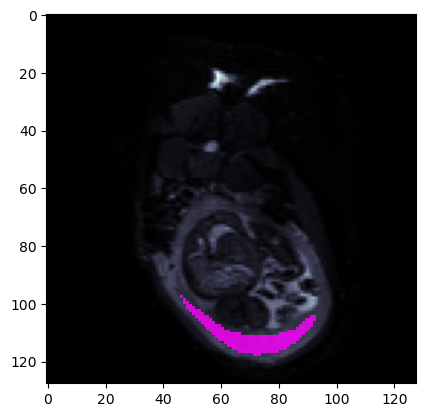

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.rot90(img_data[:,:,80]),cmap='bone')
plt.imshow(np.rot90(mask_data[:,:,80]),cmap='bone')

img_display = np.rot90(img_data[:,:,80])
mask_display = np.rot90(mask_data[:,:,80])   

mask = np.ma.masked_where(mask_display==0,mask_display)
plt.imshow(img_display,cmap='bone')
plt.imshow(mask,alpha=0.8,cmap='spring')

100%|██████████| 115/115 [00:00<00:00, 902.87it/s]


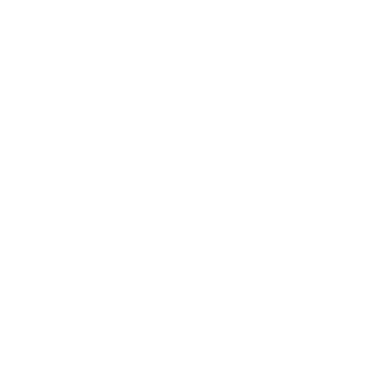

In [3]:
from celluloid  import Camera
from IPython.display import HTML
import tqdm

img_data.shape
fig = plt.figure()
camera = Camera(fig)

for i in tqdm.tqdm( range(img_data.shape[-1]) ):
    img_display = np.rot90(img_data[:,:,i])
    mask_display = np.rot90(mask_data[:,:,i])   
    mask = np.ma.masked_where(mask_display==0,mask_display)
    plt.imshow(img_display,cmap='bone')
    plt.imshow(mask,alpha=0.8,cmap='spring')
    plt.axis('off')
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video()) # conda install -c conda-forge ffmpeg